In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train = x_train.reshape(-1,28,28,1).astype("float32")/255.0
print(x_train.shape)
x_test = x_test.reshape(-1,28,28,1).astype("float32")/255.0
y_train = to_categorical(y_train)
print(y_train.shape)
y_test = to_categorical(y_test)

print(np.unique(y_train))


(60000, 28, 28, 1)
(60000, 10)
[0. 1.]


In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(x_train,y_train,epochs=5,batch_size=64)
los,acc=model.evaluate(x_test,y_test)
print(acc)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 31ms/step - accuracy: 0.7510 - loss: 0.6916
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.8854 - loss: 0.3182
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 31ms/step - accuracy: 0.9069 - loss: 0.2591
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.9188 - loss: 0.2225
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.9249 - loss: 0.2018
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9023 - loss: 0.2785
0.9027000069618225


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


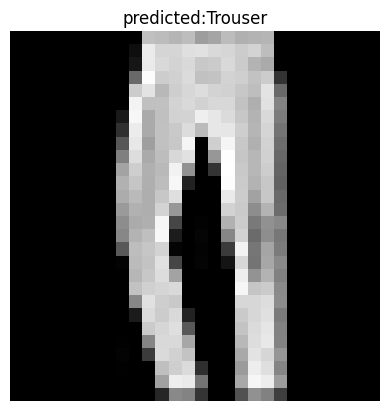

In [ ]:
#

import matplotlib.pyplot as plt
class_names=["T-shirt/top", # 0
             "Trouser",      #1
             "Pullover", #2
             "Dress",#3
             "Coat",#4
             "Sandal",#5
             "Shirt",#6
             "Sneaker",#7
             "Bag",#8
             "Ankle boot"#9
]

index = 5 # change this to any undex between 0 to 9
img = x_test[index]
label = y_test[index]

# predict
prediction = model.predict(np.expand_dims(img,axis=0))
prediction_class = np.argmax(prediction)

# Dispay result
plt.imshow(img,cmap="gray")
plt.title(f"predicted:{class_names[prediction_class]}")
plt.axis("off")
plt.show()